In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission = pd.read_csv("sample_submission.csv") # 업로드 양식

In [3]:
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [4]:
train.shape

(29305, 16)

In [5]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [7]:
train.describe()

,no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,14653.000000,38.659171,1.897357e+05,10.083057,1084.531786,87.073571,40.440096,0.240403
std,8459.769156,13.743827,1.056348e+05,2.570371,7495.715677,401.225580,12.332840,0.427335
min,1.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7327.000000,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,14653.000000,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,21979.000000,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,29305.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
train['age'].value_counts()

35    828
33    825
23    818
34    805
31    793
     ... 
88      4
85      2
89      1
86      1
87      1
Name: age, Length: 74, dtype: int64

In [9]:
train['fnlwgt'].value_counts()

203488    14
126569    13
190290    12
97723     11
126675    11
          ..
58447      1
162137     1
171578     1
198201     1
229376     1
Name: fnlwgt, Length: 19973, dtype: int64

In [10]:
train['education-num'].value_counts()

9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      415
16     347
3      334
2      148
1       46
Name: education-num, dtype: int64

In [11]:
train['capital-gain'].value_counts()

0        26883
15024      300
7688       240
7298       204
99999      148
         ...  
2993         1
6612         1
3456         1
6097         1
22040        1
Name: capital-gain, Length: 117, dtype: int64

In [12]:
train['capital-loss'].value_counts()

0       27936
1902      183
1977      143
1887      122
1485       43
        ...  
2201        1
1138        1
810         1
2465        1
1870        1
Name: capital-loss, Length: 91, dtype: int64

In [13]:
train['hours-per-week'].value_counts()

40    13652
50     2554
45     1647
60     1352
35     1154
      ...  
97        1
73        1
82        1
94        1
69        1
Name: hours-per-week, Length: 93, dtype: int64

In [14]:
train['income'].value_counts()

0    22260
1     7045
Name: income, dtype: int64

In [15]:
##?
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 ?                    1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [16]:
##?
train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 ?                    1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [17]:
##?
train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
 ?                               495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 China                            68
 Jamaica                          68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Columbia                         53
 Poland                           53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Greece                           25
 

In [18]:
train['race'].value_counts()

 White                 25081
 Black                  2776
 Asian-Pac-Islander      919
 Amer-Indian-Eskimo      290
 Other                   239
Name: race, dtype: int64

In [19]:
train['education'].value_counts()

 HS-grad         9435
 Some-college    6558
 Bachelors       4848
 Masters         1587
 Assoc-voc       1230
 11th            1057
 Assoc-acdm       980
 10th             816
 7th-8th          574
 Prof-school      500
 9th              430
 12th             415
 Doctorate        347
 5th-6th          334
 1st-4th          148
 Preschool         46
Name: education, dtype: int64

### 결측치채우기

In [20]:
train["workclass"]=train['workclass'].replace(' ?',' Private')
test["workclass"]=test['workclass'].replace(' ?',' Private')

In [21]:
train['native-country']=train['native-country'].replace(' ?','United-States')
test['native-country']=test['native-country'].replace(' ?','United-States')

In [22]:
train['occupation'] = train['occupation'].replace(' ?',' Prof-specialty')
test['occupation'] = test['occupation'].replace(' ?',' Prof-specialty')

In [23]:
train['workclass'].value_counts()

 Private             22073
 Self-emp-not-inc     2305
 Local-gov            1868
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [24]:
train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
United-States                    495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Haiti                            51
 Guatemala                        51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru                             25
 

In [25]:
train['occupation'].value_counts()

 Prof-specialty       5392
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              19537 non-null  int64 
 1   age             19537 non-null  int64 
 2   workclass       19537 non-null  object
 3   fnlwgt          19537 non-null  int64 
 4   education       19537 non-null  object
 5   education-num   19537 non-null  int64 
 6   marital-status  19537 non-null  object
 7   occupation      19537 non-null  object
 8   relationship    19537 non-null  object
 9   race            19537 non-null  object
 10  sex             19537 non-null  object
 11  capital-gain    19537 non-null  int64 
 12  capital-loss    19537 non-null  int64 
 13  hours-per-week  19537 non-null  int64 
 14  native-country  19537 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.2+ MB


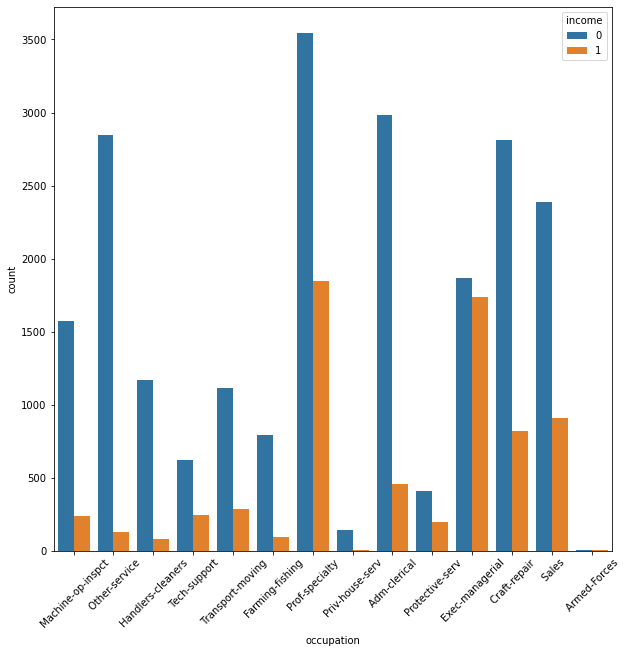

In [27]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sb.countplot("occupation", hue='income', data=train)

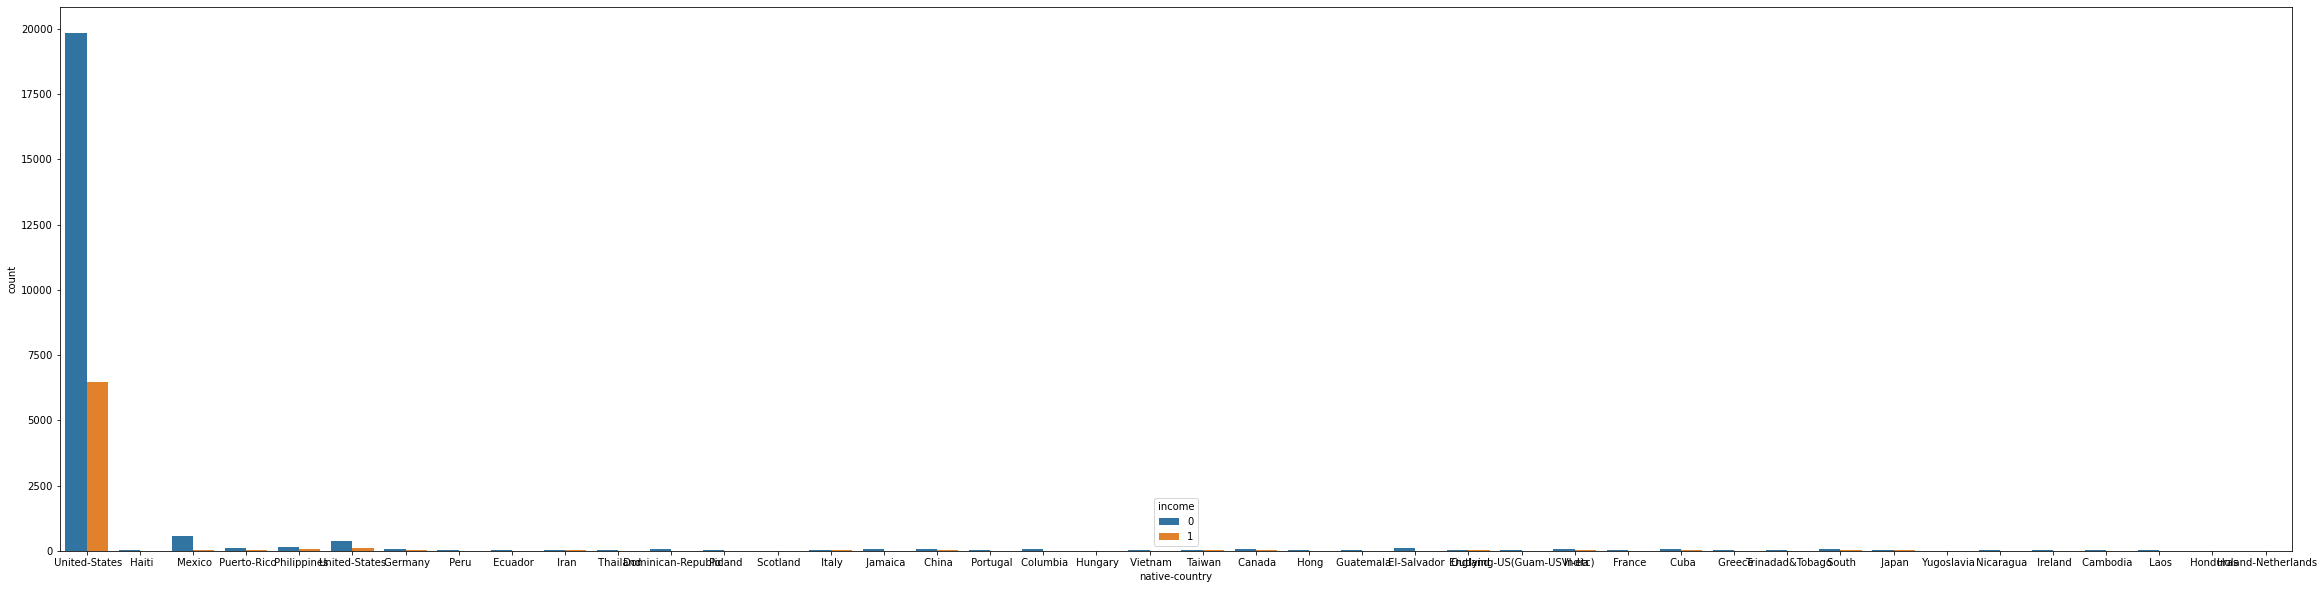

In [28]:
plt.figure(figsize=(40,10))
sb.countplot("native-country", hue='income', data=train)

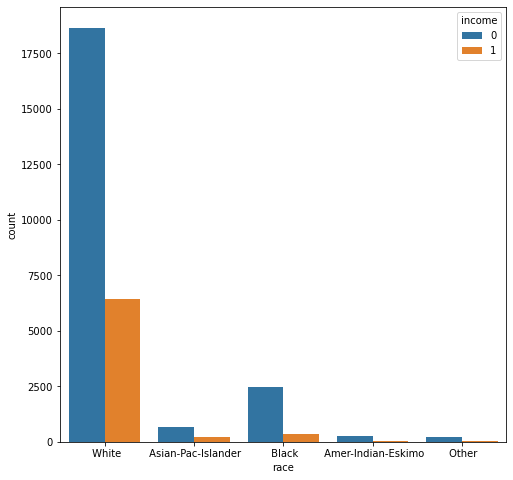

In [29]:
plt.figure(figsize=(8,8))
sb.countplot("race", hue='income', data=train)

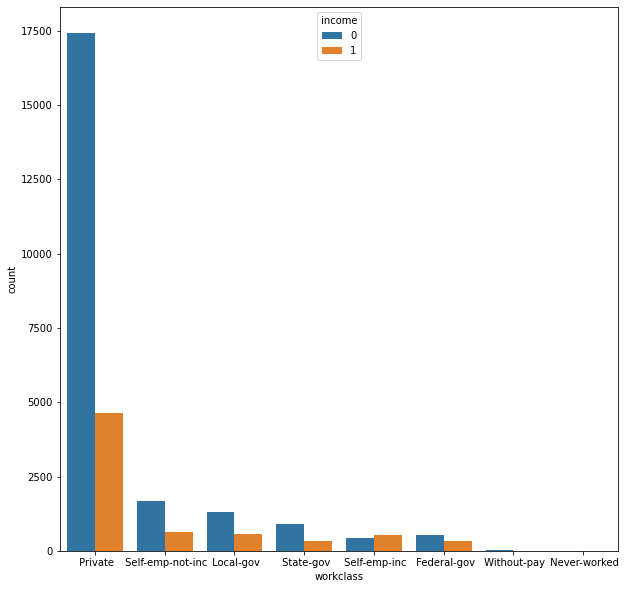

In [30]:
plt.figure(figsize=(10,10))
sb.countplot("workclass", hue='income', data=train)

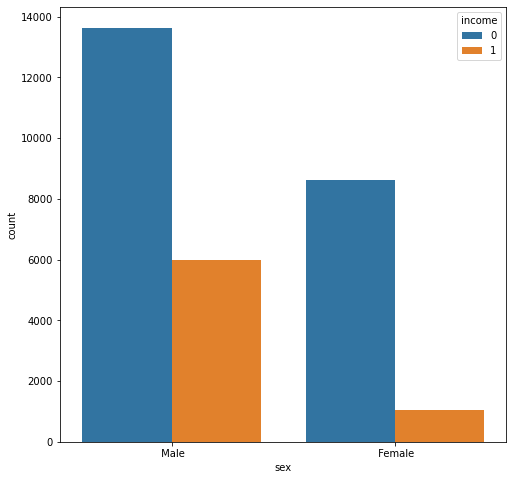

In [31]:
plt.figure(figsize=(8,8))
sb.countplot("sex", hue='income', data=train)

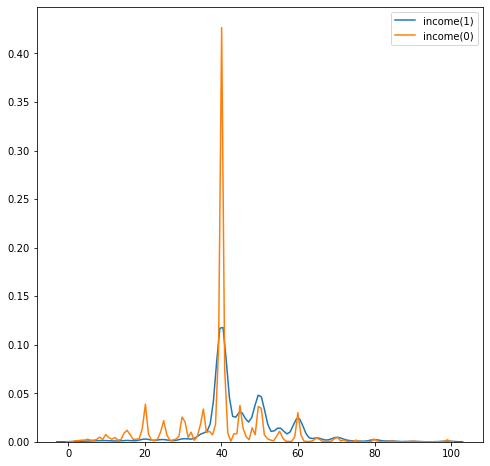

In [32]:
# 히스토그램 : 클래스별 계수 그래프 (kdeplot()) 사용해서 확인
plt.figure(figsize=(8,8))
sb.kdeplot(train[train['income']==1]["hours-per-week"])
sb.kdeplot(train[train['income']==0]["hours-per-week"])
plt.legend(['income(1)','income(0)'])

In [33]:
train['hours-per-week'].groupby(train['income'], as_index=1).count()

income
0    22260
1     7045
Name: hours-per-week, dtype: int64

In [34]:
train['marital-status'].unique()

array([' Divorced', ' Never-married', ' Married-civ-spouse', ' Separated',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],
      dtype=object)

### 범주형데이터로 그룹화

In [35]:
train['marital-status']=train['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse',' Divorced',' Never-married',' Widowed',' Married-spouse-absent',' Separated'],
                        ['Family','Family','N_Family','N_Family','N_Family','N_Family','N_Family'])
test['marital-status']=test['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse',' Divorced',' Never-married',' Widowed',' Married-spouse-absent',' Separated'],
                        ['Family','Family','N_Family','N_Family','N_Family','N_Family','N_Family'])

In [36]:
train['native-country'].unique()

array([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
       ' Philippines', 'United-States', ' Germany', ' Peru', ' Ecuador',
       ' Iran', ' Thailand', ' Dominican-Republic', ' Poland',
       ' Scotland', ' Italy', ' Jamaica', ' China', ' Portugal',
       ' Columbia', ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
       ' Guatemala', ' El-Salvador', ' England',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
       ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
       ' Holand-Netherlands'], dtype=object)

In [37]:
# 북아메리카로 바꿈-범주화(4개)
train['country']=train['native-country'].replace([' United-States', 'United-States', ' Canada', ' Outlying-US(Guam-USVI-etc)'],
                                                        ['N_America','N_America','N_America','N_America'])
test['country']=test['native-country'].replace([' United-States', 'United-States', ' Canada', ' Outlying-US(Guam-USVI-etc)'],
                                                        ['N_America','N_America','N_America','N_America'])

In [38]:
# 남아메리카로 바꿈-범주화(14개)
train['country']=train['native-country'].replace([' Mexico',' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Columbia',' Dominican-Republic',
                                                       ' Guatemala',' Haiti',' Nicaragua',' Peru',' Ecuador',' Trinadad&Tobago',' Honduras'],
                                                       ['S_America','S_America','S_America','S_America','S_America','S_America','S_America',
                                                       'S_America','S_America','S_America','S_America','S_America','S_America','S_America'])
test['country']=test['native-country'].replace([' Mexico',' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Columbia',' Dominican-Republic',
                                                       ' Guatemala',' Haiti',' Nicaragua',' Peru',' Ecuador',' Trinadad&Tobago',' Honduras'],
                                                       ['S_America','S_America','S_America','S_America','S_America','S_America','S_America',
                                                       'S_America','S_America','S_America','S_America','S_America','S_America','S_America'])

In [39]:
# 아시아로 바꿈-범주화(12개)
train['country']=train['native-country'].replace([' Philippines',' India',' China',' Japan',' Vietnam',' Taiwan',
                                                        ' Cambodia',' Hong',' Thailand',' Laos', ' South',' Iran'],
                                                       ['Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia'])
test['country']=test['native-country'].replace([' Philippines',' India',' China',' Japan',' Vietnam',' Taiwan',
                                                        ' Cambodia',' Hong',' Thailand',' Laos', ' South',' Iran'],
                                                       ['Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia'])                                                       

In [40]:
# 유럽으로 범주화 (12개국가)
train['country']=train['native-country'].replace([' Germany',' England',' Italy',' Poland',' Portugal',' Greece',
                                                        ' Ireland',' France',' Yugoslavia',' Hungary', ' Scotland',' Holand-Netherlands'],
                                                       ['Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe',
                                                       'Europe','Europe','Europe','Europe'])
test['country']=test['native-country'].replace([' Germany',' England',' Italy',' Poland',' Portugal',' Greece',
                                                        ' Ireland',' France',' Yugoslavia',' Hungary', ' Scotland',' Holand-Netherlands'],
                                                       ['Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe',
                                                       'Europe','Europe','Europe','Europe'])

In [41]:
train['education'] = train['education'].replace([' Preschool', ' 1st-4th', ' 5th-6th',' 7th-8th', ' 9th', ' 10th', ' 11th', 
                                                       ' 12th', ' Assoc-acdm', ' Assoc-voc', ' HS-grad', ' Some-college',
                                                      ' Prof-school',' Bachelors', ' Masters', ' Doctorate' ],
                                                      ['minor','minor','minor','minor','minor','minor','minor','minor',
                                                       'Associates','Associates','HS-grad','HS-grad','Prof-school', 
                                                       'Bachelors', 'Masters', 'Doctorate' ])
test['education'] = test['education'].replace([' Preschool', ' 1st-4th', ' 5th-6th',' 7th-8th', ' 9th', ' 10th', ' 11th', 
                                                       ' 12th', ' Assoc-acdm', ' Assoc-voc', ' HS-grad', ' Some-college',
                                                      ' Prof-school',' Bachelors', ' Masters', ' Doctorate' ],
                                                      ['minor','minor','minor','minor','minor','minor','minor','minor',
                                                       'Associates','Associates','HS-grad','HS-grad','Prof-school', 
                                                       'Bachelors', 'Masters', 'Doctorate' ])

In [42]:
### 데이터 수치화

In [43]:
train['marital'] = train['marital-status'].map({'Family':0, 'N_Family':1})
test['marital'] = test['marital-status'].map({'Family':0, 'N_Family':1})

In [44]:
train['race'].value_counts()

 White                 25081
 Black                  2776
 Asian-Pac-Islander      919
 Amer-Indian-Eskimo      290
 Other                   239
Name: race, dtype: int64

In [45]:
test['race'].value_counts()

 White                 16681
 Black                  1909
 Asian-Pac-Islander      600
 Amer-Indian-Eskimo      180
 Other                   167
Name: race, dtype: int64

In [46]:
train['race'] = train['race'].map({' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3,' Other':4})
test['race'] = test['race'].map({' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3,' Other':4})

In [47]:
train['sex'] = train['sex'].map({' Male':0, ' Female':1})
test['sex'] = test['sex'].map({' Male':0, ' Female':1})

In [48]:
train['country'] = train['country'].map({'N_America':0,'S_America':1,'Asia':2,'Europe':3})
test['country'] = test['country'].map({'N_America':0,'S_America':1,'Asia':2,'Europe':3})

In [49]:
train['education'] = train['education'].map({'minor':0,'Associates':1,'HS-grad':2,'Prof-school':3,'Bachelors':4,'Masters':5,'Doctorate':6})
test['education'] = test['education'].map({'minor':0,'Associates':1,'HS-grad':2,'Prof-school':3,'Bachelors':4,'Masters':5,'Doctorate':6})

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     29305 non-null  int64
 1   fnlwgt                  29305 non-null  int64
 2   capital-gain            29305 non-null  int64
 3   capital-loss            29305 non-null  int64
 4   hours-per-week          29305 non-null  int64
 5   income                  29305 non-null  int64
 6   edu_0                   29305 non-null  uint8
 7   edu_1                   29305 non-null  uint8
 8   edu_2                   29305 non-null  uint8
 9   edu_3                   29305 non-null  uint8
 10  edu_4                   29305 non-null  uint8
 11  edu_5                   29305 non-null  uint8
 12  edu_6                   29305 non-null  uint8
 13  occ_ Adm-clerical       29305 non-null  uint8
 14  occ_ Armed-Forces       29305 non-null  uint8
 15  occ_ Craft-repair  

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     19537 non-null  int64
 1   fnlwgt                  19537 non-null  int64
 2   capital-gain            19537 non-null  int64
 3   capital-loss            19537 non-null  int64
 4   hours-per-week          19537 non-null  int64
 5   edu_0                   19537 non-null  uint8
 6   edu_1                   19537 non-null  uint8
 7   edu_2                   19537 non-null  uint8
 8   edu_3                   19537 non-null  uint8
 9   edu_4                   19537 non-null  uint8
 10  edu_5                   19537 non-null  uint8
 11  edu_6                   19537 non-null  uint8
 12  occ_ Adm-clerical       19537 non-null  uint8
 13  occ_ Armed-Forces       19537 non-null  uint8
 14  occ_ Craft-repair       19537 non-null  uint8
 15  occ_ Exec-manageria

In [51]:
##원핫인코딩

In [52]:
train = pd.get_dummies(train, columns=["education"], prefix="edu")
test = pd.get_dummies(test, columns=["education"], prefix="edu")

In [53]:
train = pd.get_dummies(train, columns=["occupation"], prefix="occ")
test = pd.get_dummies(test, columns=["occupation"], prefix="occ")

In [54]:
train = pd.get_dummies(train, columns=["race"], prefix="race")
test = pd.get_dummies(test, columns=["race"], prefix="race")

In [55]:
train = pd.get_dummies(train, columns=["sex"], prefix="sex")
test = pd.get_dummies(test, columns=["sex"], prefix="sex")

In [56]:
train = pd.get_dummies(train, columns=["marital"], prefix="marital")
test = pd.get_dummies(test, columns=["marital"], prefix="marital")

In [57]:
train = pd.get_dummies(train, columns=['country'], prefix="country")
test = pd.get_dummies(test, columns=['country'], prefix="country")

In [58]:
train

,no,age,workclass,fnlwgt,education-num,marital-status,relationship,capital-gain,capital-loss,hours-per-week,...,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,marital_0,marital_1,country_3.0
0,1,25,Private,219199,7,N_Family,Not-in-family,0,0,40,...,1,0,0,0,0,1,0,0,1,0
1,2,39,Private,52978,10,N_Family,Not-in-family,0,1721,55,...,1,0,0,0,0,0,1,0,1,0
2,3,35,Private,196899,13,N_Family,Not-in-family,0,0,50,...,0,0,1,0,0,0,1,0,1,0
3,4,64,Private,135527,11,N_Family,Not-in-family,0,0,40,...,1,0,0,0,0,0,1,0,1,0
4,5,24,Private,60783,10,Family,Husband,0,0,70,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,9,N_Family,Own-child,0,0,40,...,0,0,0,0,1,1,0,0,1,0
29301,29302,21,Private,372636,9,N_Family,Own-child,0,0,40,...,0,1,0,0,0,1,0,0,1,0
29302,29303,18,Self-emp-not-inc,258474,6,N_Family,Own-child,0,0,40,...,1,0,0,0,0,1,0,0,1,0
29303,29304,33,Private,157446,7,N_Family,Not-in-family,0,0,65,...,1,0,0,0,0,1,0,0,1,0


In [59]:
train.drop('no', axis=1, inplace=True)
test.drop('no', axis=1, inplace=True)

In [60]:
train.drop('education-num', axis=1, inplace=True)
test.drop('education-num', axis=1, inplace=True)

In [61]:
train.drop('relationship', axis=1, inplace=True)
test.drop('relationship', axis=1, inplace=True)

In [62]:
train.drop('workclass', axis=1, inplace=True)
test.drop('workclass', axis=1, inplace=True)

In [63]:
train.drop('marital-status', axis=1, inplace=True)
test.drop('marital-status', axis=1, inplace=True)

In [64]:
train.drop('native-country', axis=1, inplace=True)
test.drop('native-country', axis=1, inplace=True)

In [65]:
X_train = train.drop(['income'], axis=1) # 수치형 데이터만 문제로 추출
y_train = train['income']
X_test = test.copy()

In [66]:
X_train.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'edu_0', 'edu_1', 'edu_2', 'edu_3', 'edu_4', 'edu_5', 'edu_6',
       'occ_ Adm-clerical', 'occ_ Armed-Forces', 'occ_ Craft-repair',
       'occ_ Exec-managerial', 'occ_ Farming-fishing',
       'occ_ Handlers-cleaners', 'occ_ Machine-op-inspct',
       'occ_ Other-service', 'occ_ Priv-house-serv', 'occ_ Prof-specialty',
       'occ_ Protective-serv', 'occ_ Sales', 'occ_ Tech-support',
       'occ_ Transport-moving', 'race_0', 'race_1', 'race_2', 'race_3',
       'race_4', 'sex_0', 'sex_1', 'marital_0', 'marital_1', 'country_3.0'],
      dtype='object')

In [67]:
X_train.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,edu_0,edu_1,edu_2,edu_3,edu_4,...,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,marital_0,marital_1,country_3.0
0,25,219199,0,0,40,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,39,52978,0,1721,55,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,35,196899,0,0,50,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,64,135527,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,24,60783,0,0,70,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [68]:
##모델선택

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                 random_state=5)

In [70]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500,max_depth=2,random_state=0)
model_rf.fit(X_train, y_train)
model_rf.score(X_test,y_test)

0.7877712569946772

In [71]:
pre = model_rf.predict(X_test)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     29305 non-null  int64
 1   fnlwgt                  29305 non-null  int64
 2   capital-gain            29305 non-null  int64
 3   capital-loss            29305 non-null  int64
 4   hours-per-week          29305 non-null  int64
 5   income                  29305 non-null  int64
 6   edu_0                   29305 non-null  uint8
 7   edu_1                   29305 non-null  uint8
 8   edu_2                   29305 non-null  uint8
 9   edu_3                   29305 non-null  uint8
 10  edu_4                   29305 non-null  uint8
 11  edu_5                   29305 non-null  uint8
 12  edu_6                   29305 non-null  uint8
 13  occ_ Adm-clerical       29305 non-null  uint8
 14  occ_ Armed-Forces       29305 non-null  uint8
 15  occ_ Craft-repair  

In [72]:
submission['income'] = pre 

ValueError: Length of values does not match length of index

In [ ]:
submission.to_csv('gg.csv', encoding='euc-kr', index=False) # submission